In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\sony\Desktop\python\basic codes for github\Bengaluru_House_Data.csv")
df.head()
df.shape

(13320, 9)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1=df.drop(["area_type","availability","society","balcony"],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df2=df1.dropna()
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))
df3=df2.drop(["size"],axis=1)
df3.head()

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [8]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df3[~df3["total_sqft"].apply(is_float)].head()



,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [11]:
def convert_to_num(x):
    num=x.split('-')
    if len(num)==2:
        return (float(num[0])+float(num[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [12]:
df3["total_sqft"]=df3["total_sqft"].apply(convert_to_num)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [13]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [14]:
df3.location=df3.location.apply(lambda x: x.strip())
location_count=df3.groupby('location')['location'].agg("count").sort_values(ascending=False)
location_count_less_than_20=location_count[location_count<=20]
df3.location=df3.location.apply(lambda x: "other" if x in location_count_less_than_20 else x)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,other,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


Handling Ouliers

In [15]:
df3["price_per_sqft"]=df3["price"]*100000/df3["total_sqft"]
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,other,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [16]:
df3.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [17]:
 #taking threshold as 300
df3[df3["total_sqft"]/df3.bhk<=300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,other,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [18]:
#remove outliers
df4=df3[~(df3["total_sqft"]/df3.bhk<=300)]
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,other,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [19]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        mean=np.mean(subdf["price_per_sqft"])
        sd=np.std(subdf["price_per_sqft"])  
        reduced_df=subdf[(subdf["price_per_sqft"]<=(mean+sd)) &(subdf["price_per_sqft"]>=(mean-sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5=remove_pps_outliers(df3)
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525
4,1st Phase JP Nagar,2024.0,3.0,157.0,3,7756.916996


In [20]:
df5.shape

(11785, 6)

Text(0, 0.5, 'count')

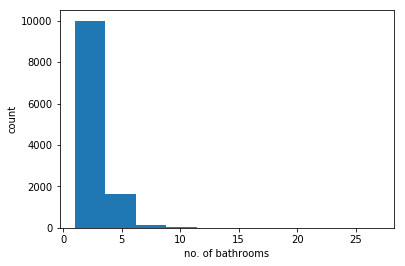

In [21]:
plt.hist(df5.bath)
plt.xlabel("no. of bathrooms")
plt.ylabel("count")

In [22]:
df5[df5.bath>df5.bhk+2].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
6247,Thanisandra,1806.0,6.0,116.0,3,6423.034330
7865,other,3300.0,14.0,500.0,9,15151.515152
8178,other,990.0,12.0,120.0,8,12121.212121
8383,other,11338.0,9.0,1000.0,6,8819.897689
9744,other,2600.0,12.0,675.0,9,25961.538462


In [23]:
df6=df5[df5.bath<df5.bhk+2]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525
4,1st Phase JP Nagar,2024.0,3.0,157.0,3,7756.916996


In [24]:
df6.shape

(11652, 6)

In [25]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={"mean":np.mean(bhk_df.price_per_sqft),"std":np.std(bhk_df.price_per_sqft),"count":bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby("bhk"):    
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

df7=remove_bhk_outliers(df6)
df7.shape

(7568, 6)

In [26]:
df8=df7.drop(["price_per_sqft"],axis=1) #required only for outlier detection
df8.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


In [27]:
df8.shape

(7568, 5)

In [28]:
dummies=pd.get_dummies(df8.location)
dummies.head()

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df9=pd.concat([df8,dummies.drop(["other"],axis=1)],axis=1).drop(["location"],axis=1)
df9.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Building

In [30]:
X=df9.drop(["price"],axis=1)
y=df9.price

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr.score(X_test,y_test)

0.7497652305700571

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.71732263, 0.59377659, 0.71063785, 0.67245517, 0.63986012])

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algo={"linear regression":{"model": LinearRegression(),"params":{"normalize":["True","False"]}},
          "lasso":{"model":Lasso(),"params":{"alpha":[1,2],"selection":["random","cyclic"]}},
          "decision tree":{"model":DecisionTreeRegressor(),"params":{"criterion":["mse","friedman_mse"],"splitter":["best","random"]}}}
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2)
    for algo_name,config in algo.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({"model":algo_name,"best_score":gs.best_score_,"best_params":gs.best_params_})
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

best_model(X,y)

,model,best_score,best_params
0,linear regression,0.713230,{'normalize': 'True'}
1,lasso,0.623463,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.538546,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [47]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [48]:
predict_price("1st Phase JP Nagar",1000,2,2)

61.486633020342936

In [49]:
predict_price("1st Phase JP Nagar",1000,3,3)

65.42172515755698

In [50]:
predict_price("Rajaji Nagar",1000,2,2)

194.14269663348844

In [51]:
import pickle
with open("bangalore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr,f)

In [52]:
import json
columns={"data_columns":[col.lower() for col in X.columns]}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))